In [1]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
import sklearn
#import sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"C:\Users\mayank\Downloads\advertising.csv")

In [3]:
df.head

<bound method NDFrame.head of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
x=df["TV"]
y=df['Sales']

In [6]:
x

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [7]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=100)

In [10]:
x_train.shape

(160,)

In [11]:
y_train.shape

(160,)

In [12]:
x_test.shape

(40,)

In [13]:
y_test.shape

(40,)

In [14]:
###train the data set using statsmodel


In [15]:
x_train.head()

168    215.4
112    175.7
171    164.5
181    218.5
7      120.2
Name: TV, dtype: float64

In [16]:
x_train_sm=sm.add_constant(x_train)

In [17]:
x_train_sm.head()

,const,TV
168,1.0,215.4
112,1.0,175.7
171,1.0,164.5
181,1.0,218.5
7,1.0,120.2


In [18]:
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.995533
TV       0.054105
dtype: float64

In [19]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     727.7
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           5.03e-61
Time:                        00:42:05   Log-Likelihood:                -359.57
No. Observations:                 160   AIC:                             723.1
Df Residuals:                     158   BIC:                             729.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9955      0.343     20.386      0.000       6.318       7.673
TV             0.0541      0.002     26.976      0.000       0.050       0.058
==============================================================================
Omnibus:                        0.122   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.941   Jarque-Bera (JB):                0.029
Skew:                           0.032   Prob(JB):                        0.986
Kurtosis:                       3.014   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
import matplotlib.pyplot as plt

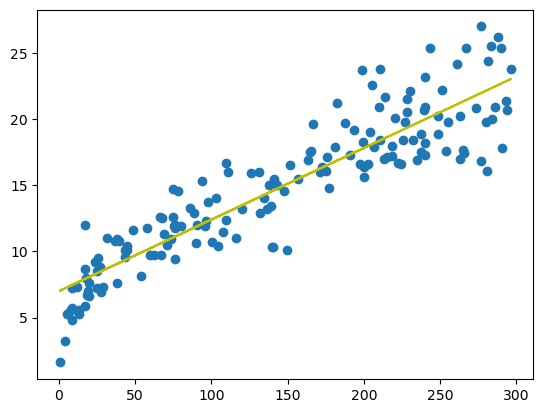

In [21]:
plt.scatter(x_train, y_train)
plt.plot(x_train,6.9955+0.0541*x_train,'y')


## Residual analysis

In [22]:
#error=f(y_train,y_train_predc)
# here f stands for funnction of
#y_train is the actual value and y_train_predic is the predicted value by the model

In [23]:
y_train_pred = lr_model.predict(x_train_sm)

In [24]:
y_train_pred

168    18.649854
112    16.501866
171    15.895885
181    18.817581
7      13.499012
         ...    
87     12.985010
103    17.161953
67     14.532427
24     10.366304
8       7.460840
Length: 160, dtype: float64

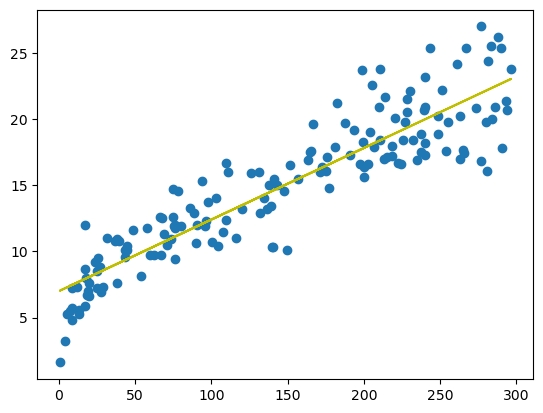

In [25]:
plt.scatter(x_train, y_train)
plt.plot(x_train,y_train_pred,'y')

In [26]:
res=y_train-y_train_pred

In [27]:
res

168   -1.549854
112    0.598134
171    1.604115
181   -1.617581
7     -0.299012
         ...   
87     3.014990
103    2.538047
67    -1.132427
24    -0.666304
8     -2.660840
Length: 160, dtype: float64

### plot the residual

C:\Users\mayank\AppData\Local\Temp\ipykernel_40868\4269386115.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


Text(0.5, 1.0, 'Residual Plot')

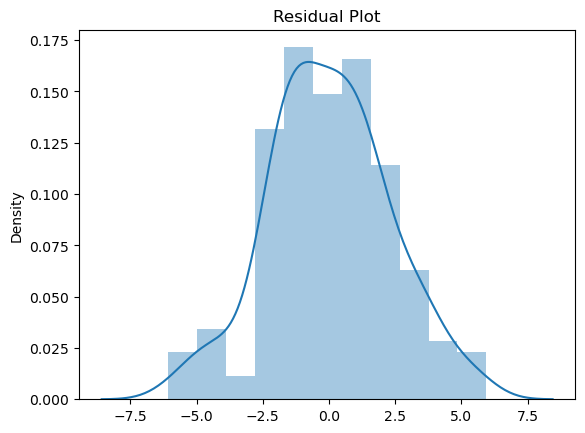

In [28]:
import seaborn as sns
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")

Text(0.5, 1.0, 'Residual Plot')

<Figure size 640x480 with 0 Axes>

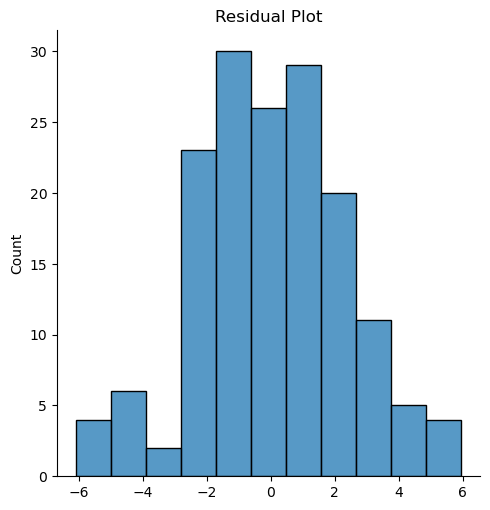

In [29]:
import seaborn as sns
plt.figure()
sns.displot(res)
plt.title("Residual Plot")

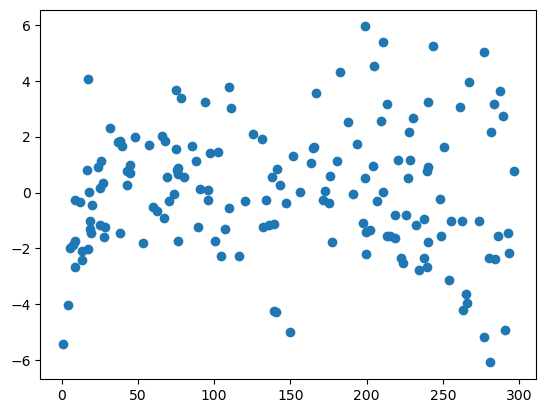

In [30]:
#look for patterns in residuals (we should not be able to identify)
plt.scatter(x_train, res)
plt.show()

# Step 4 Predictions and Evauation on the set

In [31]:
#make predictions on the test set (y_test_pred)
#evaluate the model, r-squared, on the test


In [32]:
x_test_sm=sm.add_constant(x_test)

In [33]:
x_test_sm

,const,TV
126,1.0,7.8
104,1.0,238.2
99,1.0,135.2
92,1.0,217.7
111,1.0,241.7
167,1.0,206.8
116,1.0,139.2
96,1.0,197.6
52,1.0,216.4
69,1.0,216.8


In [34]:
lr = sm.OLS(y_test, x_test_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     146.9
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           1.26e-14
Time:                        00:42:22   Log-Likelihood:                -84.699
No. Observations:                  40   AIC:                             173.4
Df Residuals:                      38   BIC:                             176.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0562      0.905      6.690      0.000       4.224       7.889
TV             0.0659      0.005     12.120      0.000       0.055       0.077
==============================================================================
Omnibus:                        1.371   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.504   Jarque-Bera (JB):                1.003
Skew:                          -0.041   Prob(JB):                        0.606
Kurtosis:                       2.228   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

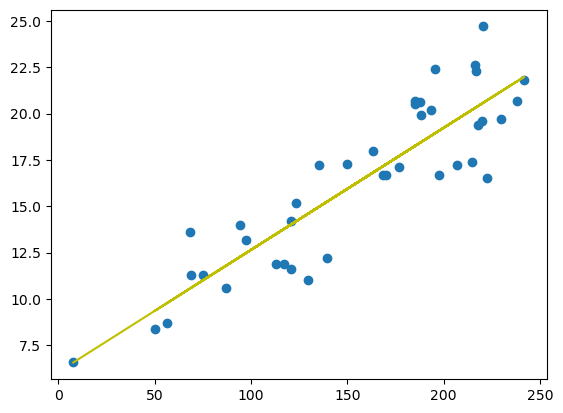

In [35]:
plt.scatter(x_test, y_test)
plt.plot(x_test,6.0562+0.0659*x_test,'y')
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [37]:
y_test_pred=lr_model.predict(x_test_sm)

In [38]:
#evaluate the model, r-squared, on the test
#r_squared
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)

In [39]:
help(r2_score)

Help on function r2_score in module sklearn.metrics._regression:

r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)
    :math:`R^2` (coefficient of determination) regression score function.
    
    Best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). In the general case when the true y is
    non-constant, a constant model that always predicts the average y
    disregarding the input features would get a :math:`R^2` score of 0.0.
    
    In the particular case when ``y_true`` is constant, the :math:`R^2` score
    is not finite: it is either ``NaN`` (perfect predictions) or ``-Inf``
    (imperfect predictions). To prevent such non-finite numbers to pollute
    higher-level experiments such as a grid search cross-validation, by default
    these cases are replaced with 1.0 (perfect predictions) or 0.0 (imperfect
    predictions) respectively. You can set ``force_finite`` to ``False`` to
    

In [40]:
#r2 #on test

In [41]:
#r2 #on test
r2 = r2_score(y_true=y_train, y_pred=y_train_pred)

In [42]:
r2

0.8216142794949134

In [43]:
#mean squared error
mean_squared_error=mean_squared_error(y_true=y_test, y_pred=y_test_pred)

In [44]:
mean_squared_error

4.043416466333893

### So far, you have worked with the ‘statsmodels’ package. This is a great package if you want to fit a line and draw inferences. However,  often, you might not be interested in the statistics part of the linear regression. You might just want to fit a line through the data and make predictions. In such cases, you can use ‘SKLearn’, which involves less hassle than ‘statsmodels’. Also, the industry standard as to what package should be used varies widely. Some companies prefer statsmodels whereas others prefer SKLearn, so it is better for you if you know about both of these packages.

 
 

# Linear Regression using SKLearn


In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
#train_test_slip


In [47]:
lm=LinearRegression()

In [48]:
lm.fit(x_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[215.4 175.7 164.5 218.5 120.2  89.7  16.9 248.8  70.6  38.2 202.5 171.3
  75.1 131.1 210.7  44.5  17.2  25.6 197.6  85.7 213.4 151.5 205.  142.9
 134.3  80.2 239.8  88.3  19.4 225.8 136.2  25.1  38.  172.5 109.8 240.1
 232.1  66.1 218.4 234.5  23.8  67.8 296.4 141.3 175.1 220.5  76.4 253.8
 191.1 287.6 100.4 228.  125.7  74.7  57.5 262.7 262.9 237.4 227.2 199.8
 228.3 290.7 276.9 199.8 239.3  73.4 284.3 147.3 224.  198.9 276.7  13.2
  11.7 280.2  39.5 265.6  27.5 280.7  78.2 163.3 213.5 293.6  18.7  75.5
 166.8  44.7 109.8   8.7 266.9 206.9 149.8  19.6  36.9 199.1 265.2 165.6
 140.3 230.1   5.4  17.9 237.4 286.   93.9 292.9  25.   97.5  26.8 281.4
  69.2  43.1 255.4 239.9 209.6   7.3 240.1 102.7 243.2 137.9  18.8  17.2
  76.4 139.5 261.3  66.9  48.3 177.   28.6 180.8 222.4 193.7  59.6 131.7
   8.4  13.1   4.1   0.7  76.3 250.9 273.7  96.2 210.8  53.5  90.4 104.6
 283.6  95.7 204.1  31.5 182.6 289.7 156.6 107.4  43.  248.4 116.  110.7
 187.9 139.3  62.3   8.6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [50]:
x_train.shape

(160,)

In [52]:
x_train_lm=x_train.values.reshape(-1,1)

In [53]:
x_train_lm.shape

(160, 1)

In [54]:
y_train_lm=y_train.values.reshape(-1,1)
y_train_lm.shape

(160, 1)

In [56]:
lm.fit(x_train_lm, y_train)

LinearRegression()

In [58]:
lm.coef_

array([0.05410548])

In [59]:
lm.intercept_

6.995532914307688

In [63]:
x_test_lm=x_test.values.reshape(-1,1)

In [64]:
#make predictions
y_train_pred=lm.predict(x_train_lm)
y_test_pred=lm.predict(x_test_lm)

In [65]:
#evaluate the model

In [66]:
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.7281352744078883

In [67]:
r2 = r2_score(y_true=y_train, y_pred=y_train_pred)

In [68]:
r2

0.8216142794949134